In [1]:
### This file creates a trainging model to predict the Tip percent for the NYC taxi data
##  Author: ashiqur@gmail.com
##  the readme file and the accopmanying report contains the details
##  Anaconda distribution for python 3.5 was used.

In [2]:
# Load general data processing packages 
import pandas as pd
import numpy as np

from datetime import datetime
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Load prediction packages 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.base import clone
from sklearn.linear_model import (Ridge, ElasticNet)
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor)

### Processing the data

In [4]:
## Load file in a dataframe
file_name = "green_tripdata_2015-09.csv"
df_orig = pd.read_csv('../data/' + file_name)

In [5]:
# Quick look at the data
df_orig

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,...,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0
6,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,...,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,1,1.0
7,2,2015-09-01 00:02:15,2015-09-01 00:05:34,N,1,-73.946701,40.797321,-73.937645,40.804516,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
8,2,2015-09-01 00:02:36,2015-09-01 00:07:20,N,1,-73.963150,40.693829,-73.956787,40.680531,1,...,6.0,0.5,0.5,1.46,0.0,NaN,0.3,8.76,1,1.0
9,2,2015-09-01 00:02:13,2015-09-01 00:07:23,N,1,-73.896820,40.746128,-73.888626,40.752724,1,...,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2,1.0


In [6]:
## Print the names of columns
list(df_orig)

['VendorID',
 'lpep_pickup_datetime',
 'Lpep_dropoff_datetime',
 'Store_and_fwd_flag',
 'RateCodeID',
 'Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude',
 'Passenger_count',
 'Trip_distance',
 'Fare_amount',
 'Extra',
 'MTA_tax',
 'Tip_amount',
 'Tolls_amount',
 'Ehail_fee',
 'improvement_surcharge',
 'Total_amount',
 'Payment_type',
 'Trip_type ']

#### Split the data for training and testing

In [7]:
## train on 80% of the data
df = df_orig.sample(frac=0.8,random_state=10)

# test on rest 20% of data
test_df = df_orig.drop(df.index)

# save the test data in a file
test_df.to_csv('../data/test_data.csv', index=False)
## this file will be loaded in the model_test.ipynb file for testing

In [8]:
### Chosing the right set of data for training

In [9]:
## Check Total_amount (there are some negative and 0 numbers) 
print("0 :", sum(i for i in df_orig.Total_amount == 0))
print("0<:", sum(i for i in df_orig.Total_amount < 0))

0 : 4172
0<: 2417


In [10]:
## Keep only positive Total Payment Amount
df = df[df.Total_amount > 0]

In [11]:
## keep only Payment_type = 1 (only credit card type include tip info)
df = df[df.Payment_type == 1]

In [12]:
## Define Tip_percent field
df["Tip_percent"] = df.apply(lambda r: r["Tip_amount"]*100/r["Total_amount"], axis =1)

#### Visualize the Tip_percent

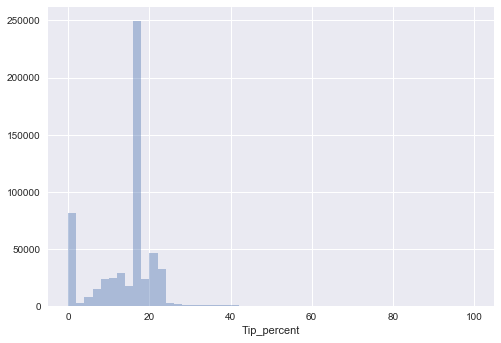

In [13]:
## See Tip_percent distribution 
sns.distplot(df["Tip_percent"], kde=False)

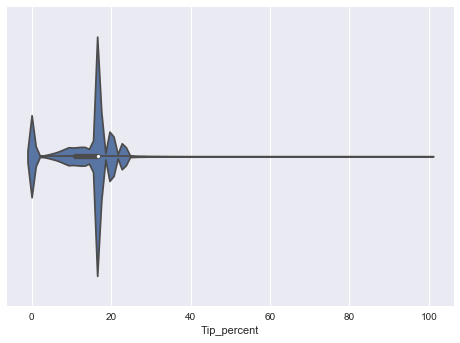

In [14]:
## See Tip_percent viloing plot 
sns.violinplot(df["Tip_percent"])

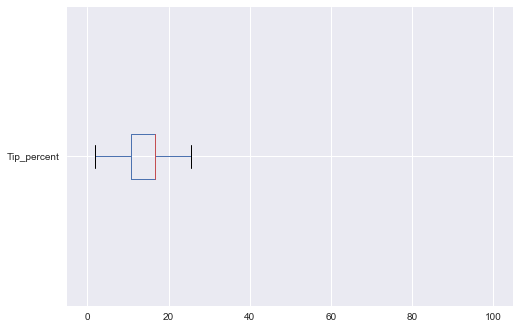

In [15]:
## See Tip_percent box plot
df["Tip_percent"].plot.box(vert=False)

In [16]:
df["Tip_percent"].describe()

count    560648.000000
mean         14.142380
std           7.840881
min           0.000000
25%          10.769231
50%          16.666667
75%          16.666667
max         100.000000
Name: Tip_percent, dtype: float64

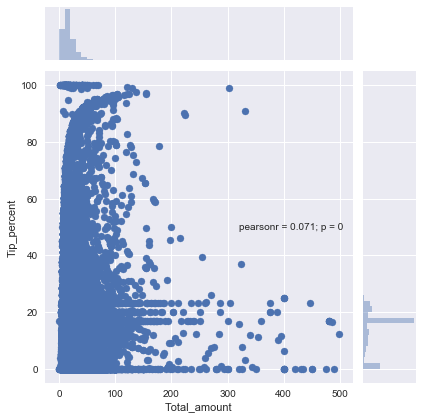

In [17]:
## See Tip_percent vs Total_amount
sns.jointplot(x="Total_amount", y="Tip_percent",data=df)

#### Separate target, select data columns for training

In [18]:
## sepate the column (Tip_percent) to predict in a target variable
target = df["Tip_percent"].values
df = df.drop('Tip_percent' , axis=1)

## print the list of remainin column names
list(df)

['VendorID',
 'lpep_pickup_datetime',
 'Lpep_dropoff_datetime',
 'Store_and_fwd_flag',
 'RateCodeID',
 'Pickup_longitude',
 'Pickup_latitude',
 'Dropoff_longitude',
 'Dropoff_latitude',
 'Passenger_count',
 'Trip_distance',
 'Fare_amount',
 'Extra',
 'MTA_tax',
 'Tip_amount',
 'Tolls_amount',
 'Ehail_fee',
 'improvement_surcharge',
 'Total_amount',
 'Payment_type',
 'Trip_type ']

In [19]:
# drop these valiables (not used for preditions)
drop_list =['VendorID','lpep_pickup_datetime','Lpep_dropoff_datetime','Store_and_fwd_flag','Pickup_longitude', 'Pickup_latitude','Dropoff_longitude','Dropoff_latitude','Tip_amount','Ehail_fee','Payment_type']
df = df.drop(drop_list, axis=1)
# Remaining
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560648 entries, 1270745 to 562530
Data columns (total 10 columns):
RateCodeID               560648 non-null int64
Passenger_count          560648 non-null int64
Trip_distance            560648 non-null float64
Fare_amount              560648 non-null float64
Extra                    560648 non-null float64
MTA_tax                  560648 non-null float64
Tolls_amount             560648 non-null float64
improvement_surcharge    560648 non-null float64
Total_amount             560648 non-null float64
Trip_type                560646 non-null float64
dtypes: float64(8), int64(2)
memory usage: 47.1 MB


In [20]:
## define the type of variables (categorical or numeric)
vtype = {}
vtype['RateCodeID'] = 'categorical'
vtype['Passenger_count'] = 'categorical'
vtype['Trip_distance'] = 'numeric'
vtype['Fare_amount'] = 'numeric'
vtype['Extra'] = 'numeric'
vtype['MTA_tax'] = 'numeric'
vtype['Tolls_amount'] = 'numeric'
vtype['improvement_surcharge'] = 'numeric'
vtype['Total_amount'] = 'numeric'
vtype['Trip_type '] = 'numeric' # keep it numeric for now. will change after missing value imputation

********************************************************************************
RateCodeID
1     549250
5       9278
2       1374
4        377
3        367
99         2
Name: RateCodeID, dtype: int64

count    560648.000000
mean          1.072322
std           0.552205
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          99.000000
Name: RateCodeID, dtype: float64

********************************************************************************
Passenger_count
1    471891
2     42866
5     21073
3     12800
6      8713
4      3153
0       119
8        22
7         6
9         5
Name: Passenger_count, dtype: int64

count    560648.000000
mean          1.367241
std           1.037562
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Passenger_count, dtype: float64

********************************************************************************
Trip_distance


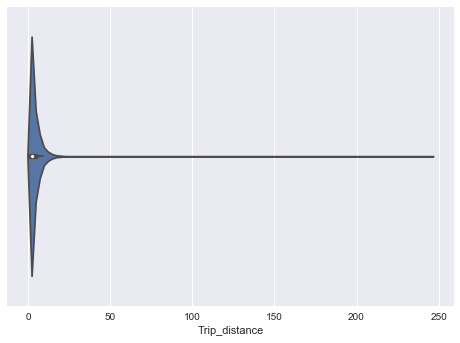


count    560648.000000
mean          3.441016
std           3.281541
min           0.000000
25%           1.290000
50%           2.410000
75%           4.450000
max         246.280000
Name: Trip_distance, dtype: float64

********************************************************************************
Fare_amount


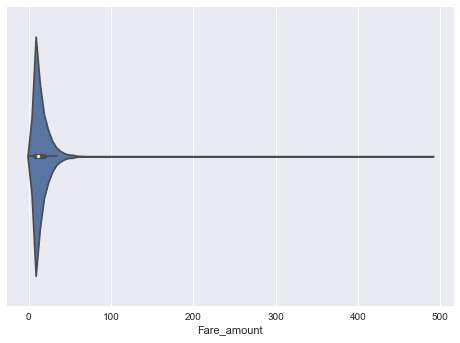


count    560648.000000
mean         14.163988
std          10.704189
min           0.000000
25%           7.000000
50%          11.000000
75%          18.000000
max         490.000000
Name: Fare_amount, dtype: float64

********************************************************************************
Extra


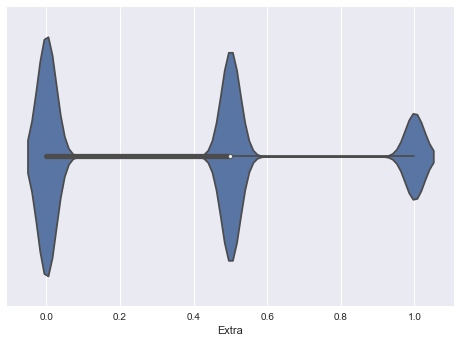


count    560648.000000
mean          0.356785
std           0.362479
min           0.000000
25%           0.000000
50%           0.500000
75%           0.500000
max           1.000000
Name: Extra, dtype: float64

********************************************************************************
MTA_tax


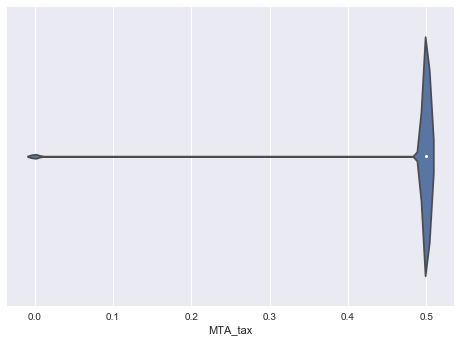


count    560648.000000
mean          0.491488
std           0.064679
min           0.000000
25%           0.500000
50%           0.500000
75%           0.500000
max           0.500000
Name: MTA_tax, dtype: float64

********************************************************************************
Tolls_amount


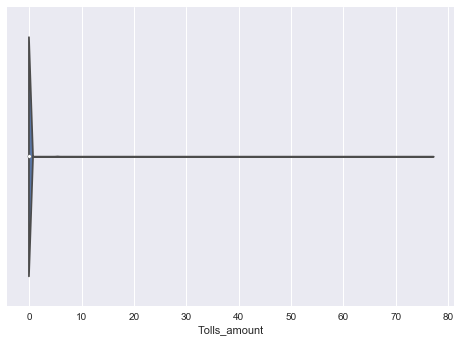


count    560648.000000
mean          0.177361
std           1.065898
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          77.000000
Name: Tolls_amount, dtype: float64

********************************************************************************
improvement_surcharge


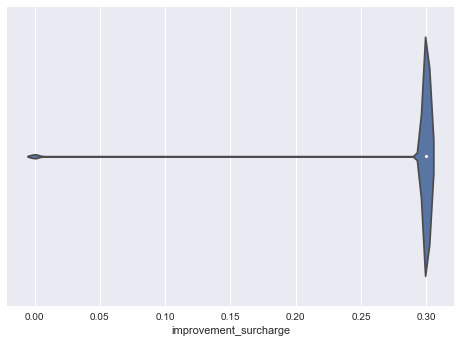


count    560648.000000
mean          0.295050
std           0.038215
min           0.000000
25%           0.300000
50%           0.300000
75%           0.300000
max           0.300000
Name: improvement_surcharge, dtype: float64

********************************************************************************
Total_amount


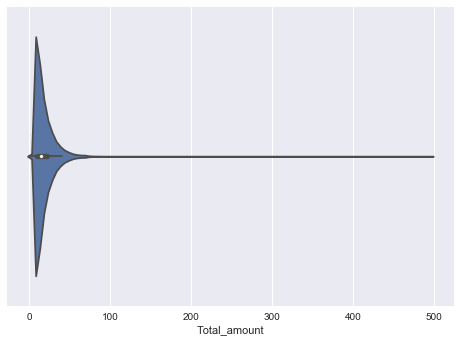


count    560648.000000
mean         18.118670
std          12.853701
min           0.010000
25%           9.950000
50%          14.300000
75%          22.300000
max         497.550000
Name: Total_amount, dtype: float64

********************************************************************************
Trip_type 


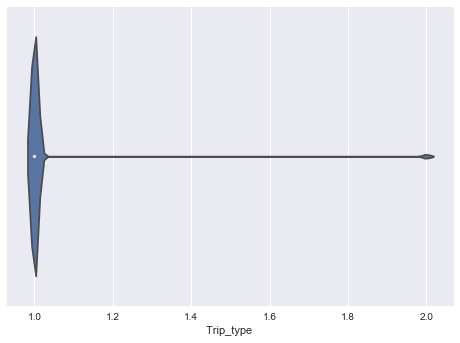


count    560646.000000
mean          1.016185
std           0.126186
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: Trip_type , dtype: float64



In [21]:
## For each variable:
#      describe and plot
#      find mode/median
#      inpute missing values with mode/median
#      store the missing value replacements
#  
missing_replacements = {}
for x in list(df):
    print('*'*80)
    print(x)
    if vtype[x] == 'categorical':
        replacement = df[x].mode()[0]
        print(df[x].value_counts())
    else:
        replacement = df[x].median()
        sns.violinplot(df[x])
        plt.show()
    print("")
    print(df[x].describe())
    print("")
    missing_replacements[x] = replacement
    df[x].fillna(replacement,inplace=True)

In [22]:
## Change "Trip_type "  to categorical 
vtype['Trip_type '] = 'categorical'
df['Trip_type '] = df['Trip_type '].apply(int)

In [23]:
df.info()
## save the list of columns in a variable for test data processing
column_list = list(df)
column_type = vtype

## sanity check 
print(len(column_list) == len(list(column_type.keys())) and set(column_list) == set(list(column_type.keys())))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560648 entries, 1270745 to 562530
Data columns (total 10 columns):
RateCodeID               560648 non-null int64
Passenger_count          560648 non-null int64
Trip_distance            560648 non-null float64
Fare_amount              560648 non-null float64
Extra                    560648 non-null float64
MTA_tax                  560648 non-null float64
Tolls_amount             560648 non-null float64
improvement_surcharge    560648 non-null float64
Total_amount             560648 non-null float64
Trip_type                560648 non-null int64
dtypes: float64(7), int64(3)
memory usage: 47.1 MB
True


#### Processt categorical data

In [24]:
# Encode categorical values into integers
# The data is already integer in format - but we do an extra step to remind that
# this step is a part of the process

encode_list = list(df.dtypes[df.dtypes.map(lambda x: x=='int64')].index.values)
encode_ind = [list(df.columns.values).index(x) for x in encode_list]

label_encoders = {}
for xx in encode_list:
    print('Category values in: ', xx)
    ## we use the whole dataset to find category values (except trip_type)
    if xx == 'Trip_type ':
        xx_set = set(df[xx])
    else:
        xx_set = set(df_orig[xx])
    print(list(xx_set))
    le = preprocessing.LabelEncoder()
    le.fit(list(xx_set))
    print(list(set(df[xx])))
    df.loc[:,xx] = le.transform(df[xx])
    label_encoders[xx]  = le

Category values in:  RateCodeID
[1, 2, 99, 3, 4, 5, 6]
[1, 2, 99, 3, 4, 5]
Category values in:  Passenger_count
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Category values in:  Trip_type 
[1, 2]
[1, 2]


In [25]:
# One Hot Encoding for categorical variables
one_hot_encoder = preprocessing.OneHotEncoder(categorical_features=encode_ind)
one_hot_encoder.fit(df.values)
print('Data shape before One-Hot Coding', df.shape)

data_array = one_hot_encoder.transform(df.values).toarray()
print('Data shape after One-Hot Coding', data_array.shape)

Data shape before One-Hot Coding (560648, 10)
Data shape after One-Hot Coding (560648, 25)


In [26]:
## keep tracrk for varibales names for before and after one hot encoding
feature_num_to_name = []
for xx in list(df):
    if xx in encode_list:
        for ind in label_encoders[xx].classes_:
            feature_num_to_name.append(xx + ' index ' + str(ind) )
    else:
        feature_num_to_name.append(xx)

### Training : train & crossvalidate 

In [27]:
# Split data in train (80%) and validation (20%)
X_train, X_test, y_train, y_test = train_test_split(data_array, target, test_size = 0.2, random_state=0)

# define a simple funcation to automate crossvalidation (5-fold)
def run_model(models):
    for model in models:
        scores = cross_val_score(clone(model), X_train, y_train, cv=5, n_jobs = -1)
        model_name = str(type(model)).split(".")[-1][:-2]
        print(model_name + ' scores: ' + ', '.join('{:6.4f}'.format(i) for i in scores))
        print(model_name + ' accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

In [28]:
## linear models
models = [Ridge(), ElasticNet()]
ss = run_model(models)

Ridge scores: 0.5294, 0.5549, 0.4382, 0.5078, 0.5537
Ridge accuracy: 0.52 (+/- 0.09)
ElasticNet scores: 0.4574, 0.4711, 0.4253, 0.4451, 0.4668
ElasticNet accuracy: 0.45 (+/- 0.03)


In [29]:
# accuracy for the linear model were not that good

In [30]:
# ensemble models 
models = [RandomForestRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]
run_model(models)

RandomForestRegressor scores: 0.9971, 0.9946, 0.9960, 0.9957, 0.9935
RandomForestRegressor accuracy: 1.00 (+/- 0.00)
ExtraTreesRegressor scores: 0.9959, 0.9952, 0.9941, 0.9950, 0.9936
ExtraTreesRegressor accuracy: 0.99 (+/- 0.00)
GradientBoostingRegressor scores: 0.7835, 0.7825, 0.7759, 0.7777, 0.7713
GradientBoostingRegressor accuracy: 0.78 (+/- 0.01)


#### Feature importance

Feature importance ranking:
 1. Feature 24:  Trip_type  index 1: (62.17)
 2. Feature 19:  Extra: (28.81)
 3. Feature 20:  MTA_tax: (5.75)
 4. Feature 22:  improvement_surcharge: (1.62)
 5. Feature  4:  RateCodeID index 5: (1.35)
 6. Feature 18:  Fare_amount: (0.08)
 7. Feature 16:  Passenger_count index 9: (0.06)
 8. Feature  0:  RateCodeID index 1: (0.05)
 9. Feature 17:  Trip_distance: (0.04)
10. Feature 21:  Tolls_amount: (0.03)
11. Feature 23:  Total_amount: (0.02)
12. Feature  7:  Passenger_count index 0: (0.00)
13. Feature  9:  Passenger_count index 2: (0.00)
14. Feature  8:  Passenger_count index 1: (0.00)
15. Feature  6:  RateCodeID index 99: (0.00)
16. Feature 11:  Passenger_count index 4: (0.00)
17. Feature 12:  Passenger_count index 5: (0.00)
18. Feature  3:  RateCodeID index 4: (0.00)
19. Feature 10:  Passenger_count index 3: (0.00)
20. Feature  2:  RateCodeID index 3: (0.00)
21. Feature  1:  RateCodeID index 2: (0.00)
22. Feature 14:  Passenger_count index 7: (0.00)
23. Fe

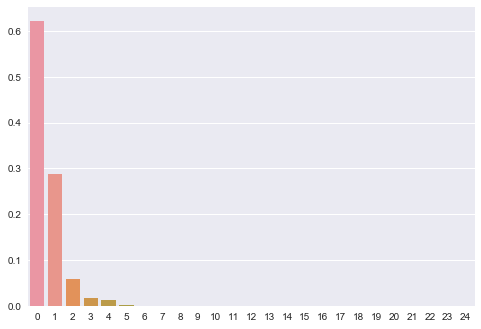

In [31]:
# Choose random forrest model and see variable importance
model = RandomForestRegressor()
model.fit(X_train, y_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking:")
for f in range(X_train.shape[1]):
    print("%2d. Feature %2d:  %s: (%02.2f)" % (f + 1, indices[f], feature_num_to_name[indices[f]], importances[indices[f]]*100))

# Plot the feature importances of the forest
sns.barplot([i for i in range(X_train.shape[1])] , importances[indices])

#### Hyperparameter tuning

In [32]:
# Model Tuning of Random forrest 
n_of_estimators=[10, 15, 20, 25, 30]

for n in n_of_estimators:
    print('Number of estimators: ',n)
    models = [RandomForestRegressor(n_estimators=n, random_state=0, n_jobs = -1)]
    for model in models:
        model.fit(X_train,y_train)
        score = model.score(X_test,y_test)
        model_name = str(type(model)).split(".")[-1][:-2]
        print(model_name + ' score: %7.5f' % score)
    print('')

Number of estimators:  10
RandomForestRegressor score: 0.99690

Number of estimators:  15
RandomForestRegressor score: 0.99717

Number of estimators:  20
RandomForestRegressor score: 0.99721

Number of estimators:  25
RandomForestRegressor score: 0.99728

Number of estimators:  30
RandomForestRegressor score: 0.99724



#### Model selection and final training

In [33]:
## Select Random forrest with 20 estimators
selected_model_list = [RandomForestRegressor(n_estimators=20, random_state=0, n_jobs = -1)]
selected_models = {}

In [34]:
# Train selected models with all available data
for model in selected_model_list:
    rmod  = clone(model).fit(data_array,target)
    model_name = str(type(model)).split(".")[-1][:-2]
    selected_models[model_name] = rmod

### Save preprocessing data and training models in file

In [35]:
import pickle
objects_tosave = [column_list, column_type, missing_replacements, label_encoders, one_hot_encoder, selected_models]
pickle.dump(objects_tosave, open('../data/prediction_model.p', 'wb' )) 